In [2]:
import operator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [245]:
df = pd.read_csv("sample.csv") # input CSV for analysis

5.238492830214587
0.9928737946435826


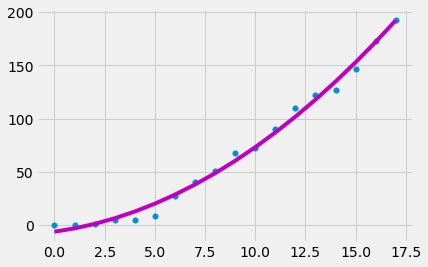

In [241]:
x=df['date']
y=df['numconf'] # change to 'numdeaths' to get the predicted number of deaths

x = x[:,np.newaxis]
y = y[:,np.newaxis]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
fitted_model = model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=30)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()
func = model.coef_

In [62]:
func

array([[ 0.00000000e+00, -3.74957056e+01,  5.38369214e+00,
        -2.57744103e-01,  4.89705439e-03, -3.07691243e-05]])

In [242]:
#generate the values from the model
lst = []
for i in range(18,50):
    cur_x = 0
    for j in range(1,3):
        cur_x += (func[0][j])* (i ** j)
    lst.append((i,cur_x))

In [243]:
#append to dataframe
for i in range(len(lst)):
    df = df.append({"numconf": lst[i][1], "prnameFR":"Northwest Territories","pruid":1,"prname":"Canada","date":lst[i][0]}, ignore_index=True)

In [244]:
#export to new csv file for further modeling
df.to_csv(r'nova_scotia_prediction_numconf1.csv', index = False, header=True)